In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report, roc_curve, auc

# Evaluation Metrics

## Common Regression Evaluation Metrics



Given:
- $y_i$: Actual value
- $\hat{y}_i$: Predicted value
- $n$: Number of samples

---

### 1. Mean Absolute Error (MAE)

Measures the average absolute difference between predicted and actual values.

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

- Intuitive and in the same unit as target
- Robust to outliers

---

### 2. Mean Squared Error (MSE)

Measures average squared difference between actual and predicted.

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- Punishes large errors more
- Sensitive to outliers

---

### 3. Root Mean Squared Error (RMSE)

Square root of MSE:

$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

- Same unit as target
- Intuitive for interpretation

---

### 4. R² Score (Coefficient of Determination)

Explains proportion of variance captured:

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

- Closer to 1 → better
- Can be negative if worse than baseline

In [ ]:
# Example values
y_true = np.array([3.0, -0.5, 2.0, 7.0])
y_pred = np.array([2.5, 0.0, 2.1, 7.8])

# MAE
print("MAE:", mean_absolute_error(y_true, y_pred))

# MSE
print("MSE:", mean_squared_error(y_true, y_pred))

# RMSE
print("RMSE:", root_mean_squared_error(y_true, y_pred))

# R²
print("R2 Score:", r2_score(y_true, y_pred))

MAE: 0.475
MSE: 0.2874999999999999
RMSE: 0.5361902647381803
R2 Score: 0.9605995717344754


## Common Classification Evaluation Metrics

Given:
- TP: True Positives
- TN: True Negatives
- FP: False Positives
- FN: False Negatives
---

**1. Confusion Matrix**

Displays counts of TP, TN, FP, FN in matrix form.

![Confusion Matrix](https://drive.google.com/uc?id=1Bk9DRLVR5_nsIWq2NhsMR1J5C57GvHcW)

---

**2. Accuracy**

Proportion of correct predictions:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

---

**3. Precision**

Of the predicted positives, how many were actually positive?

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

---

**4. Recall (Sensitivity / True Positive Rate)**

Of all actual positives, how many were predicted correctly?

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

![Precision vs. Recall](https://drive.google.com/uc?id=12kcP4Isul1l-nNtcNI3aG444YR1fvKOG)

![Precision vs. Accuracy](https://drive.google.com/uc?id=1uUr1erW43vcuUUtWxcpwlP_ChtOWFRwW)

---

**5. F1 Score**

Harmonic mean of precision and recall:

$$
\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

---

**6. ROC AUC (Receiver Operating Characteristic)**

- Plots TPR vs FPR
- AUC = Area under the curve (1.0 is perfect)

---

In [ ]:
# Example binary classification
y_true = np.array([0, 1, 1, 0, 1, 1])
y_pred = np.array([0, 1, 0, 0, 1, 1])
y_prob = np.array([0.2, 0.8, 0.3, 0.1, 0.9, 0.7])  # Probabilities for ROC AUC

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("ROC AUC:", roc_auc_score(y_true, y_prob))

Accuracy: 0.8333333333333334
Precision: 1.0
Recall: 0.75
F1 Score: 0.8571428571428571
Confusion Matrix:
 [[2 0]
 [1 3]]
ROC AUC: 1.0


## Visualizing Classification Metrics

Once we calculate metrics like Accuracy, Precision, Recall, F1, and Confusion Matrix,
it's helpful to visualize the results.

---

**1. Confusion Matrix (Heatmap)**

A **Confusion Matrix** is a table layout that allows visualization of:
- **TP (True Positive)**: Correctly predicted Positive class
- **TN (True Negative)**: Correctly predicted Negative class
- **FP (False Positive)**: Incorrectly predicted as Positive
- **FN (False Negative)**: Incorrectly predicted as Negative

We use `seaborn.heatmap()` to plot it.

---

**2. Classification Report**

Provides a tabular summary of:
- Precision
- Recall
- F1 Score
- Support (number of instances for each class)

---

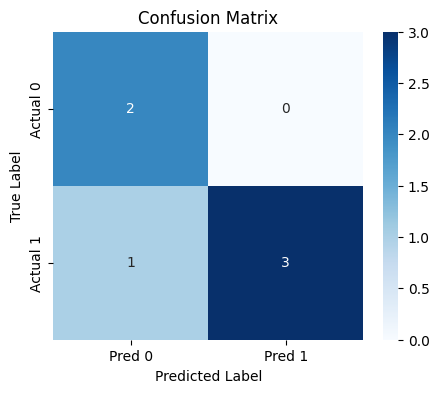

In [ ]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



## ROC AUC for Binary Classification

**ROC AUC** is a popular metric to evaluate binary classifiers.

- **ROC Curve**: Plots the **True Positive Rate (TPR)** vs **False Positive Rate (FPR)** at various thresholds.
- **AUC (Area Under the Curve)**: Measures the entire area under the ROC curve.

**Key Terms**

- **True Positive Rate (Recall)**:
  $$ \text{TPR} = \frac{TP}{TP + FN} $$
  
- **False Positive Rate**:
  $$ \text{FPR} = \frac{FP}{FP + TN} $$

**Interpretation**

| AUC Score | Meaning                     |
|-----------|-----------------------------|
| 1.0       | Perfect classifier          |
| 0.9–1.0   | Excellent                   |
| 0.8–0.9   | Good                        |
| 0.7–0.8   | Fair                        |
| 0.5       | No skill (random guessing) |
| < 0.5     | Worse than random          |

---
**Simple Explanation: ROC AUC**

When your model predicts a probability (e.g., 0.93, 0.41, 0.12), it doesn't just say "yes" or "no" — it tells you how confident it is.

Now the question is:  
**How well does the model separate Class 1 from Class 0 across all possible thresholds?**  
That’s where **ROC** and **AUC** come in.

---

**ROC Curve**

**ROC (Receiver Operating Characteristic)** curve is a plot of:

- **True Positive Rate (TPR)** on the Y-axis  
- **False Positive Rate (FPR)** on the X-axis

It shows how the model behaves at **different thresholds** (from 0 to 1).

For each threshold:
- If predicted score ≥ threshold → predict class 1
- Otherwise → predict class 0

At each step, we calculate:
- TPR = TP / (TP + FN) → how many real positives we correctly identified
- FPR = FP / (FP + TN) → how many real negatives we wrongly labeled as positive

---

**AUC: Area Under the ROC Curve**

**AUC (Area Under Curve)** is a single number that summarizes the entire ROC curve.

It answers this question:

> "If I randomly pick one positive sample and one negative sample,  
what is the probability that the model gives a **higher score** to the positive one?"

---

**What Does AUC Value Mean?**

- **1.0** → Perfect classifier  
- **0.9 - 1.0** → Excellent  
- **0.8 - 0.9** → Good  
- **0.7 - 0.8** → Fair  
- **0.5** → No skill (random guessing)  
- **< 0.5** → Worse than random (model is confused!)

---


- **ROC Curve**: Shows performance across all thresholds.
- **AUC Score**: Tells how well the model separates the classes overall.
- Higher AUC = Better model.


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load binary classification dataset
data = load_breast_cancer()
X = data.data
y = data.target  # Binary: 0 = malignant, 1 = benign

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Train logistic regression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict probabilities for class 1 (benign)
y_scores = model.predict_proba(X_test)[:, 1]

### ROC Curve Visualization

The ROC curve shows how the classifier's performance changes with different thresholds.

The diagonal line represents a random classifier (AUC = 0.5). The further the curve bows towards the top-left, the better the model.


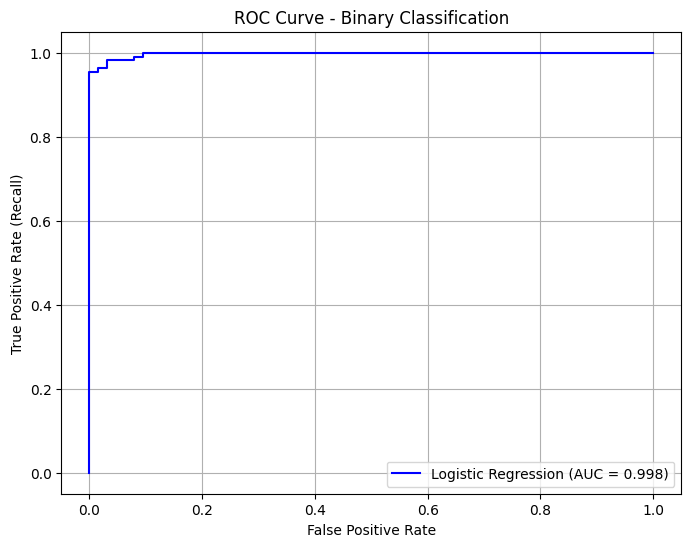

In [ ]:
# Compute ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc_score = roc_auc_score(y_test, y_scores)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_score:.3f})", color='blue')
#plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Binary Classification")
plt.legend()
plt.grid(True)
plt.show()